# Japanese subset_ main thesis project -ReHo

In [1]:
import pandas as pd
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, ConcatDataset, TensorDataset
from torchvision import transforms
from sklearn.model_selection import KFold
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## start of classsification using Reho

In [2]:
control_base_path = '/dbstore/zmohaghegh/Japanese_subset/summary_measures/Control_reho/ReHo_Normalised_z/'
mdd_base_path = '/dbstore/zmohaghegh/Japanese_subset/summary_measures/MDD_reho/ReHo_Normalised_z/'

#define data path for control and MDD seprately

control_files_path = [control_base_path + c for c in os.listdir(control_base_path) if c.startswith('R')]
mdd_files_path = [mdd_base_path + m for m in os.listdir(mdd_base_path) if m.startswith('R')]
print(len(control_files_path), len(mdd_files_path))

255 255


### load data with nan 

In [3]:
#loading data seprately and set a label column for Control=0 and MDD=1

control_dataset_reho_zero = [[nib.load(c).get_fdata(),0] for c in control_files_path]
mdd_dataset_reho_zero = [[nib.load(m).get_fdata(),1] for m in mdd_files_path]

##### define numpy array for doing the zero nan

In [4]:
control_reho_zero_nan2= control_dataset_reho_zero
mdd_reho_zero_nan2 = mdd_dataset_reho_zero

print(mdd_reho_zero_nan2[0][0].shape)
print(len(mdd_reho_zero_nan2))
print(mdd_reho_zero_nan2[0][1])

mdd_reho_zero_nan3 = np.array(mdd_reho_zero_nan2)
control_reho_zero_nan3 =np.array(control_reho_zero_nan2)
print(control_reho_zero_nan2[0][0].shape)
print(len(control_reho_zero_nan2))

control_reho_zero_nan3[0][1]

(91, 109, 91)
255
1
(91, 109, 91)
255


/data/zmohaghegh/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/data/zmohaghegh/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


0

In [5]:
len(mdd_dataset_reho_zero)

255

In [6]:
len(control_dataset_reho_zero)

255

In [7]:
len(mdd_dataset_reho_zero[0])
len(control_dataset_reho_zero[0])

2

In [8]:
mdd_dataset_reho_zero[0][0].shape
control_dataset_reho_zero[0][0].shape

(91, 109, 91)

In [9]:
control_dataset_reho_zero[190][0][:,34,56]

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  0.84428144,  0.79683548,  0.81698316,  0.81124616,
        0.7445063 ,  0.58621883,  0.37639371,  0.31544447,  0.26352054,
       -0.03605158,  0.08161569,  0.33698365,  0.47744834,  0.6262241 ,
        0.54178131,  0.63222915,  0.73859745,  0.97454691,  1.05264175,
        0.96295232,  0.82701445,  0.47442257,  0.12972231, -0.13232711,
       -0.1364637 , -0.20667242, -0.36424959,  0.04453607,  0.46118417,
        0.54277307,  0.53507698,  0.33272326,  0.62601441,  0.47528505,
        0.18374254, -0.0439913 , -0.08049857,  0.01097339,  0.17220072,
       -0.07944057,  0.05261297, -0.24137823, -0.3461414 , -0.53761476,
       -0.35510996, -0.24967036,  0.00409639,  0.05395242,  0.36063883,
        0.77951801,  1.08243525,  1.01388049,  0.39845243,  0.24

In [10]:
mdd_dataset_reho_zero[100][0][:,34,56]

array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
        1.45227027e+00,  1.58096850e+00,  1.55474269e+00,  1.78304231e+00,
        1.76300514e+00,  1.83052921e+00,  1.73060858e+00,  1.49151731e+00,
        8.38405073e-01,  1.51621774e-01,  5.58712631e-02,  7.96048989e-05,
       -4.80724126e-01, -2.73976892e-01, -4.16711837e-01, -7.36057162e-01,
       -9.18137878e-02,  1.02721065e-01, -2.07152441e-02, -1.40896872e-01,
       -1.06029892e+00, -1.56802857e+00, -1.51698637e+00,  3.41506273e-01,
        6.67224765e-01,  3.86154920e-01,  7.52673447e-02,  5.10709226e-01,
        1.27161467e+00,  7.03470409e-01,  8.21025670e-01,  6.33770823e-01,
       -2.22559988e-01, -1.43178129e+00, -1.59917831e+00, -1.46645176e+00,
       -1.42161059e+00, -

In [11]:
#example control
zero_nan_control_800= np.nan_to_num(control_dataset_reho_zero[100][0],copy=True)
zero_nan_control_800[:,34,56]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.48777372,  1.2406584 ,  1.4356035 ,  1.22117043,
        1.00571787,  0.76214719,  0.35963631, -0.23168679, -0.45638958,
       -0.16080996,  0.49989119,  0.93124443,  0.74422765,  0.7854051 ,
        0.88619387,  0.38361844,  0.3941094 ,  0.49163163,  1.13368094,
        0.6418246 ,  0.22323866, -0.18731211, -0.44641194, -0.56746888,
       -0.63471437, -0.19365352,  0.34087026,  0.4244968 ,  0.18198553,
       -0.35061437, -0.87546802, -0.82348537, -0.78925931, -0.69691849,
       -0.32085621,  0.64473861,  0.47025567,  0.25582269, -0.15222025,
        0.21086404,  0.8183105 ,  1.42699277,  0.99631751,  0.58198655,
        0.23567411,  1.42640007,  1.15368652, -1.85775161, -1.73210943,
       -1.69069016, -1.30803788,  1.19026971, -0.84467965, -1.92

In [12]:
#example mdd
zero_nan_mdd_700= np.nan_to_num(mdd_dataset_reho_zero[200][0],copy=True)
zero_nan_mdd_700[:,34,56]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.29152313,  0.44130495,  0.96773052,  0.73992622,
        0.2600117 , -0.74334651, -0.90461767, -0.20272742,  0.47446784,
        0.54080647,  0.2975871 ,  0.25276366, -0.06263041,  0.01617018,
        0.26543203,  0.18063113,  0.06255207,  0.17151089, -0.14120804,
       -0.56722862, -0.31063247, -0.25900012, -0.12108749, -0.64518219,
       -1.4728694 , -1.89632857, -1.14513648, -0.17089775,  0.44840688,
       -0.37902629, -0.96976787, -1.1759299 , -0.70549959, -0.72158879,
       -0.49296591,  0.06177398,  0.81728059,  0.86775333,  1.03077555,
        1.16670609,  1.47919154,  1.60115576,  1.42342389,  0.93247628,
        0.48033294,  0.09809522, -0.33412564,  0.20377555,  0.15091807,
       -0.15625139, -0.15019156, -0.35716426,  0.00880462,  0.26

In [13]:
#zero_nan_control
print(control_reho_zero_nan3.shape)
print(control_reho_zero_nan3[0][0].shape)
print(control_reho_zero_nan3[0][1])
print(control_reho_zero_nan3[100][1])
print(control_reho_zero_nan3[0].shape)
print(type(control_reho_zero_nan3))


for i in range(len(control_dataset_reho_zero)):    
    control_reho_zero_nan3[i][0] =np.nan_to_num(control_dataset_reho_zero[i][0],copy=True)
    control_reho_zero_nan3[i][1] =np.nan_to_num(control_dataset_reho_zero[i][1],copy=True)

(255, 2)
(91, 109, 91)
0
0
(2,)
<class 'numpy.ndarray'>


In [14]:
print(control_reho_zero_nan3.shape)
print(control_reho_zero_nan3[0][0].shape)
print(control_reho_zero_nan3[0][1]) ## mdd label for control=0
print(control_reho_zero_nan3[110][1])
control_reho_zero_nan3[110][0][:,34,56]


(255, 2)
(91, 109, 91)
0
0


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.06614435, -1.01540589, -0.71072811, -0.44491008,
       -0.34172788, -0.25811049, -0.20024702, -0.13896149,  0.21498063,
        0.51091492,  0.57632029,  0.53002542,  0.78445596,  0.96108156,
        0.82715279,  0.9089272 ,  0.9437722 ,  0.98673213,  1.0297544 ,
        1.3200103 ,  0.99331921,  0.00941133,  0.32382074,  0.57887042,
        0.77261919,  0.47314835, -0.37916994,  0.05379576,  0.39684567,
        0.44778129,  0.74853742,  1.06071186,  0.96000719,  0.76873165,
        0.70595926,  0.54874903,  0.1659247 , -0.01674568,  0.2624737 ,
        0.23249663,  0.13489975, -0.11505482,  0.30504587, -0.06905459,
        0.01931714, -0.13842943,  0.31110176,  0.4200452 ,  0.41377753,
       -0.08890891,  0.23268196,  0.39775434,  0.5576129 ,  0.53

In [15]:
#zero_nan_mdd

print(mdd_reho_zero_nan3.shape)
print(mdd_reho_zero_nan3[0][0].shape)
print(type(mdd_reho_zero_nan3))

for i in range(len(mdd_dataset_reho_zero)):    
    mdd_reho_zero_nan3[i][0] =np.nan_to_num(mdd_dataset_reho_zero[i][0],copy=True)
    mdd_reho_zero_nan3[i][1] =np.nan_to_num(mdd_dataset_reho_zero[i][1],copy=True)

mdd_reho_zero_nan3.shape

(255, 2)
(91, 109, 91)
<class 'numpy.ndarray'>


(255, 2)

In [16]:
print(mdd_reho_zero_nan3.shape)

mdd_reho_zero_nan3.shape
print(mdd_reho_zero_nan3[0][0].shape)
print(mdd_reho_zero_nan3[0].shape)
print(mdd_reho_zero_nan3[0][1])
mdd_reho_zero_nan3[210][0][:,34,56]

(255, 2)
(91, 109, 91)
(2,)
1


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.15539241,  1.09352338,  1.0503757 ,  1.43768322,
        1.51124728,  1.43333316,  0.91985607,  0.08519863,  0.00556017,
       -0.52437329, -0.77414989, -1.12355745, -1.14360178, -1.20118988,
       -0.74124074, -0.30203831, -0.13550924, -0.58327138, -0.92846113,
       -0.50423551, -0.61148393, -0.59212548, -0.61149406, -0.64308512,
       -0.73825824, -0.75959575, -0.96736431, -0.5596289 , -0.66086632,
       -0.96182823, -1.21448779, -1.07356155, -0.8627215 , -0.84807622,
       -1.20948648, -1.15942013, -0.94385028, -0.81308424, -1.16578507,
       -1.2775619 , -1.09162247, -1.41870797, -0.78159875,  0.2320734 ,
        0.72339165,  0.75407511,  0.96091902,  0.93616128,  1.08235204,
        1.20815241,  1.57756925,  1.41936743,  1.42582369,  1.35

### load and add 1 channel to dimension of data 'without nan'

In [17]:
# np.reshape(control_dataset[0][0], (1, 91, 109, 91))

control_reho_4d_zero_nan = [[np.reshape(c[0], (1, 91, 109, 91)), c[1]] for c in control_reho_zero_nan3]
mdd_reho_4d_zero_nan = [[np.reshape(m[0], (1, 91, 109, 91)), m[1]] for m in mdd_reho_zero_nan3]

In [18]:
print(mdd_reho_4d_zero_nan[200][0].shape)
mdd_reho_4d_zero_nan[200][1]

(1, 91, 109, 91)


1

In [19]:
print(control_reho_4d_zero_nan[100][0].shape)
control_reho_4d_zero_nan[100][1]

(1, 91, 109, 91)


0

In [20]:
len(mdd_reho_4d_zero_nan)

255

In [21]:
len(mdd_reho_4d_zero_nan[0])

2

### concat data for control and MDD without nan

In [22]:
dataset_ukbb_reho_zero_nan= ConcatDataset([control_reho_4d_zero_nan, mdd_reho_4d_zero_nan])

print(dataset_ukbb_reho_zero_nan[0][0].shape)
print(dataset_ukbb_reho_zero_nan[400][1])
print(dataset_ukbb_reho_zero_nan[210][1])


dataset_ukbb_reho_zero_nan[400][0][0,:,54,45]

#subject number=1500, mdd label,reho value for voxels along axial with y ,z dimention = 54,45

(1, 91, 109, 91)
1
0


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.33312091,  0.06847724, -0.01332448,  0.25450975,
        0.18561168,  0.62408435,  0.00435615, -0.64261788, -1.11098552,
       -1.33609593, -1.46832263, -1.18205512, -0.63163793,  0.17810667,
        0.17898022,  0.26126394,  0.45428491, -0.04555789, -0.14852883,
       -0.81909472, -1.12703812, -1.16551518, -1.29773605, -0.84779751,
       -0.61350608, -0.59259439, -0.59763038, -0.56037432, -0.2379358 ,
       -0.50788766, -0.98722398, -1.62808084, -1.5638597 , -1.24100637,
       -0.99000007, -0.86490786, -1.10475743, -1.04548001, -1.4244467 ,
       -1.67849422, -0.91127968, -1.05153143, -1.20191872, -0.6885078 ,
       -0.11124627,  0.07369193,  0.03454851, -0.29502261, -0.86841565,
       -0.70042658, -0.55885959, -0.15037392, -0.56065845, -0.86743265,
       -1.50171769, -1.6106174 , -1.1426816 , -1.21337485, -1.52

In [23]:
len(dataset_ukbb_reho_zero_nan)

510

In [24]:
len(dataset_ukbb_reho_zero_nan[0])

2

In [25]:
print(dataset_ukbb_reho_zero_nan[200][1]) # subject 800 label MDD =0
print(dataset_ukbb_reho_zero_nan[400][1]) # subject 1500 label MDD =1 

#problem solved : mdd_zero_nan label have problem : instead of 1 integer we have an array (91,109,91)

print(dataset_ukbb_reho_zero_nan[0][1])

dataset_ukbb_reho_zero_nan[400][1].shape

0
1
0


()

In [26]:
dataset_ukbb_reho_zero_nan[400][1]

1

### Network architecture

In [27]:
#Define a Convolutional Neural Network : BASED ON https://www.biorxiv.org/content/10.1101/2019.12.17.879346v1

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.downsample = nn.AvgPool3d(2, stride=2, padding=0)
        
        self.CNNlayer = nn.Sequential(
            nn.Conv3d(1, 64, kernel_size=3, stride=1),
            nn.ELU(),
            nn.Conv3d(64, 16, kernel_size=3, stride=1),
            nn.ELU(),
            nn.MaxPool3d(2)
        )
        
        self.flat1 = nn.Linear(160000, 16)   
        self.flat2 = nn.Linear(16, 1)
            
    def forward(self, x):
        x=self.downsample(x)
        #print(f'avg-pool: {x.size()}\n----------')
        #print(f'number of nan in this layer = {torch.isnan(x).sum()}')
        
        x=self.CNNlayer(x)
        #print(f'convolution1+2+maxpool: {x.size()} \n----------')
        
        x=x.reshape(x.size(0), -1)
        #print(f'reshape after cnn: {x.size()}\n----------')
        
        x=F.elu(self.flat1(x))
        #print(f'fully-connected1: {x.size()}\n----------')
                    
        x=self.flat2(x)
        #print(f'fully-connected2: {x.size()}\n----------')
        
        return x

### lunch wandb

In [28]:
import wandb
!wandb login 390734ff44d817dbba59927d4eb542e564627b3b

wandb: Appending key for api.wandb.ai to your netrc file: /data/zmohaghegh/.netrc


### Train and Test (without CV)

In [29]:
### spilit data to train-test and validation

dataset_size= len(dataset_ukbb_reho_zero_nan)
train_count = int(0.7 * dataset_size) 
valid_count= int(0.2 * dataset_size)
test_count = dataset_size - train_count -valid_count

print(dataset_size)
print(train_count)
print(valid_count)
print(test_count)

510
357
102
51


In [30]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score,confusion_matrix

In [31]:
wandb.init(project='mdd-japanese-reho')  

#define the newtwork 
network = ConvNet()
network = network.double()

#set hyper parameter
learning_rate= 0.001
num_epochs = 10
BATCH_SIZE = 10
best_acc= None

# Define a Loss function 
loss_function = nn.BCEWithLogitsLoss()  

# create the optimizer
optimizer = optim.SGD(network.parameters(), momentum=0.9, lr = learning_rate, weight_decay=1e-3)

# load data splits
train_dataset, test_dataset ,valid_dataset = torch.utils.data.random_split(dataset_ukbb_reho_zero_nan, (train_count, test_count,valid_count))

train_dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)  
test_dataset_loader  = torch.utils.data.DataLoader(test_dataset , batch_size=BATCH_SIZE, shuffle=False)
valid_dataset_loader  = torch.utils.data.DataLoader(valid_dataset , batch_size=BATCH_SIZE, shuffle=True)


#dataloaders = {'train': train_dataset_loader, 'test': test_dataset_loader, 'valid': valid_dataset_loader}

network.train()
# start training loop:
for epoch in range(0, num_epochs):
    print(f'*********Starting epoch {epoch+1}')
    
    train_loss = 0
    total =0 
    correct = 0
    
    # train model/network 
    for i, data in enumerate(train_dataset_loader, 0):
        #print(f'train {i}')
            
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
            
        # zero the gradient buffers
        optimizer.zero_grad()
            
        # forward pass
        outputs = network(inputs)
    
        outputss = outputs.squeeze(1) #### [10,1] ---> [10]
        
        #nloss requires a 1-D tensor of class indices of the target (outputs in your case) but not one-hot vectors of the target.
        #The shape of the target should be [mini_batch_size], 
        #but in your case it happens to be [mini_batch_size,num_classes].
        
        predicted = outputss.data > 0.0 # the loss function contain also a sigmoid layer <0 = false >0 =true
        
        labels = labels.double()
        
        #calcuate loss/error
        loss = loss_function(outputss, labels)
              
        # backward pass
        loss.backward()
            
        # Does the update , gradient descent
        optimizer.step() 
            
        #loss_list.append(loss.item())
        train_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print(f'acc_train :{100 * correct/total}')
    print (f'loss_train = {train_loss/total}')
    
    wandb.log({ "epoch_reho": epoch ,"train_Loss_reho": train_loss/total, "trian_acc_reho" :100 * correct /total })

    
    print('Training process has finished') 

    print('starting validation :')

    network.eval()

    valid_loss=0
    total=0
    correct=0

    with torch.no_grad():
        for i, data in enumerate(valid_dataset_loader, 0):
            #print(f'valid {i}')
            inputs, lables = data

            outputs = network(inputs)

            outputss=outputs.squeeze(1) #[10,1] ---> [10]
            lables=lables.double()

            # prediction 
            predicted = outputss.data > 0.0

            loss = loss_function(outputss, lables)

            valid_loss += loss.item()
            total += lables.size(0)
            correct += (predicted == lables).sum().item()

        print(f'acc_valid :{100 * correct/total}')
        print (f'loss_valid = {valid_loss/total}')

        wandb.log({ "validation_acc_reho 100" :100 * correct /total, "validation_Loss_reho": valid_loss/total })

        current_valid_acc =100 * correct/total
        if not best_acc or best_acc < current_valid_acc:
            best_acc = current_valid_acc
            
            print('Saving trained model.')
            PATH_best = './model-japanese-best-acc-reho.pth'
            torch.save(network.state_dict(), PATH_best)
        print('validation process has finished.')

wandb: Currently logged in as: zahramhn (use `wandb login --relogin` to force relogin)


*********Starting epoch 1


/data/zmohaghegh/venv/lib64/python3.6/site-packages/torch/autograd/__init__.py:147: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag


acc_train :56.582633053221286
loss_train = 0.06892525957104258
Training process has finished
starting validation :
acc_valid :50.98039215686274
loss_valid = 0.07116705932109504
Saving trained model.
validation process has finished.
*********Starting epoch 2
acc_train :78.71148459383754
loss_train = 0.05136321747118962
Training process has finished
starting validation :
acc_valid :61.76470588235294
loss_valid = 0.0685076024048573
Saving trained model.
validation process has finished.
*********Starting epoch 3
acc_train :87.6750700280112
loss_train = 0.03218618011654887
Training process has finished
starting validation :
acc_valid :67.6470588235294
loss_valid = 0.07303642524990847
Saving trained model.
validation process has finished.
*********Starting epoch 4
acc_train :93.27731092436974
loss_train = 0.019447080249116375
Training process has finished
starting validation :
acc_valid :69.6078431372549
loss_valid = 0.07393573021816112
Saving trained model.
validation process has finished.


### Test the network using the test data without CV

In [32]:
network.load_state_dict(torch.load(PATH_best))

test_loss = 0
correct = 0
total= 0

print('Starting testing')

network.eval()

with torch.no_grad():
    for i, data in enumerate(test_dataset_loader, 0):
        #print(f'test {i}')
        
        inputs, lables = data
        lables = lables.double() # loss function get only double not Long
        
        outputs = network(inputs)
        #print(outputs.size())
        
        outputss = outputs.squeeze(1) #[10,1] ---> [10]
        #print(outputss.size())
        #print(lables.size())
    
        predicted = outputss.data > 0.0
        
        loss = loss_function(outputss, lables)
        
        test_loss += loss.item()
        total += lables.size(0)
        correct += (predicted == lables).sum().item()
        
    wandb.log({ "test_Accuracy_reho": 100 * correct /total  , "test_Loss_reho": test_loss/total })

    print(f'test_loss= {test_loss/total}')
    print(f'test_acc= {100 * correct / total}')

Starting testing
test_loss= 0.06361892273627388
test_acc= 78.43137254901961


## Cross validation loop 

In [33]:
from sklearn.model_selection import train_test_split
train_dataset_cv, test_dataset_cv = train_test_split(dataset_ukbb_reho_zero_nan, test_size=0.20, train_size=0.8,shuffle=True)
print(len(train_dataset_cv))
print(len(test_dataset_cv))

408
102


### train and validation loop CV

In [34]:
wandb.init(project='mdd-japanese-reho')  

k_folds = 5
kfold_results = {}
kfold = KFold(n_splits=k_folds, shuffle=True)

#torch.manual_seed(42)
num_epochs = 8
batch_size = 10
learning_rate= 0.001


#Define a Loss function 
loss_function = nn.BCEWithLogitsLoss()

for fold, (train_ids, valid_ids) in enumerate(kfold.split(train_dataset_cv)):
    best_loss_cv= None
    
    print(f"FOLD {fold}\n--------------------------------")
    
    # Sample elements randomly from a given list of ids,
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)
    
    # Define data loaders for training and testing data in this fold
    train_loader = torch.utils.data.DataLoader(train_dataset_cv, batch_size=batch_size, sampler=train_subsampler)
    valid_loader = torch.utils.data.DataLoader(train_dataset_cv, batch_size=batch_size, sampler=valid_subsampler)
    
    #define network
    network = ConvNet()
    network = network.double()
    
    # create our optimizer
    optimizer = optim.SGD(network.parameters(), momentum=0.9, lr = learning_rate, weight_decay=1e-3)
    
    # in the training loop:
    
    network.train() # prepare model for training
    
    for epoch in range(0, num_epochs):
        print(f'*********Starting epoch {epoch+1}')
        
        train_loss_cv = 0
        total =0
        correct=0

        # train model/network 
        for i, data in enumerate(train_loader, 0):
            #print(f'train {i}')
            
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            
            # zero the gradient buffers
            optimizer.zero_grad()
            
            # forward pass
            outputs = network(inputs)
            
            # print(outputs.size)
            outputss=outputs.squeeze(1) #### [10,1] ---> [10]
            
            # prediction 
            predicted = outputss.data > 0.0
            
            labels=labels.double()
            
            #calcuate loss/error
            loss = loss_function(outputss, labels)
            
            # backward pass
            loss.backward()
            
            # Does the update , gradient descent
            optimizer.step() 
            
            correct += (predicted == labels).sum().item()
            train_loss_cv += loss.item()
            total += labels.size(0)
            
        wandb.log({ "epoch_cv": epoch , "train_Loss_cv": train_loss_cv/total, "train_acc_cv": 100 * correct / total })
        
        print(f'train loss= {train_loss_cv/total}')
        print(f'train Acc= {100 * correct / total}')
        
        
        print('Training process has finished.')
        print('Starting testing')

        # validate the network using the validation data, for this fold
        correct= 0
        total = 0
        valid_loss_cv=0
        
        network.eval()

        with torch.no_grad():
            for i, data in enumerate(valid_loader, 0):
                #print(f'test {i}')

                inputs, lables = data

                outputs = network(inputs)

                outputss=outputs.squeeze(1) #[10,1] ---> [10]
                lables=lables.double()

                # prediction 
                predicted = outputss.data > 0.0

                loss = loss_function(outputss, lables)

                valid_loss_cv += loss.item()
                total += lables.size(0)
                correct += (predicted == lables).sum().item()

            wandb.log({ "validation_acc_cv": 100 * correct /total, "validation_Loss_cv": valid_loss_cv/total , "learning rate":learning_rate})
            
            current_valid_loss_cv = valid_loss_cv/total
            
            print(f'valid_acc :{100 * correct /total}')
            print(f'valid_loss: {valid_loss_cv/total}')
                  
            if not best_loss_cv or best_loss_cv > current_valid_loss_cv:
                best_loss_cv = current_valid_loss_cv
                
                print('Saving best valid -trained model.')
                path_best_loss_reho = f'/data/zmohaghegh/TempStats_3D-CNN/best_model_reho_japanese/model-japanese_best-reho-fold-{fold}.pth'
                torch.save(network.state_dict(), path_best_loss_reho )
                
            print('validation process has finished')
        
    print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
    print('--------------------------------')
        
    kfold_results[fold] = 100.0 * (correct / total)

epoch_reho,9
train_Loss_reho,0.00062
trian_acc_reho,100.0
_runtime,2916
_timestamp,1619524506
_step,20
validation_acc_reho 100,67.64706
validation_Loss_reho,0.11073
test_Accuracy_reho,78.43137
test_Loss_reho,0.06362


epoch_reho,▁▂▃▃▄▅▆▆▇█
train_Loss_reho,█▆▄▃▃▂▂▁▁▁
trian_acc_reho,▁▅▆▇▆▇████
_runtime,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇███
_timestamp,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇███
_step,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
validation_acc_reho 100,▁▅▇█▇█▇▇▇▇
validation_Loss_reho,▁▁▁▂▁▃▄█▇▆
test_Accuracy_reho,▁
test_Loss_reho,▁


FOLD 0
--------------------------------
*********Starting epoch 1
train loss= 0.06829911043678237
train Acc= 58.58895705521472
Training process has finished.
Starting testing
valid_acc :73.17073170731707
valid_loss: 0.06867389760840906
Saving best valid -trained model.
validation process has finished
*********Starting epoch 2
train loss= 0.05210400455724899
train Acc= 76.68711656441718
Training process has finished.
Starting testing
valid_acc :54.8780487804878
valid_loss: 0.11070922375649213
validation process has finished
*********Starting epoch 3
train loss= 0.03923946774617465
train Acc= 80.06134969325153
Training process has finished.
Starting testing
valid_acc :71.95121951219512
valid_loss: 0.06664339519521005
Saving best valid -trained model.
validation process has finished
*********Starting epoch 4
train loss= 0.022747756525360575
train Acc= 90.49079754601227
Training process has finished.
Starting testing
valid_acc :71.95121951219512
valid_loss: 0.07016518263421666
validation p

valid_acc :60.49382716049383
valid_loss: 0.07273116986330252
Saving best valid -trained model.
validation process has finished
*********Starting epoch 2
train loss= 0.05080330406102534
train Acc= 75.53516819571865
Training process has finished.
Starting testing
valid_acc :61.72839506172839
valid_loss: 0.0736958843594428
validation process has finished
*********Starting epoch 3
train loss= 0.031540677988846424
train Acc= 87.46177370030581
Training process has finished.
Starting testing
valid_acc :66.66666666666667
valid_loss: 0.08426294194781402
validation process has finished
*********Starting epoch 4
train loss= 0.022899811719781945
train Acc= 90.51987767584097
Training process has finished.
Starting testing
valid_acc :70.37037037037037
valid_loss: 0.07462654400683957
validation process has finished
*********Starting epoch 5
train loss= 0.00951988968533569
train Acc= 98.47094801223241
Training process has finished.
Starting testing
valid_acc :72.8395061728395
valid_loss: 0.07494368015

### results of train and validation for CV

In [35]:
print(f"K-FOLD CROSS VALIDATION RESULTS FOR japanese reho {k_folds} FOLDS\n--------------------------------")
_sum = 0.0

for key, value in kfold_results.items():
    print(f'Fold {key}: {value} %')
    _sum += value

print(f'Average: {_sum/len(kfold_results.items())} %')

K-FOLD CROSS VALIDATION RESULTS FOR japanese reho 5 FOLDS
--------------------------------
Fold 0: 68.29268292682927 %
Fold 1: 74.39024390243902 %
Fold 2: 75.60975609756098 %
Fold 3: 83.9506172839506 %
Fold 4: 69.1358024691358 %
Average: 74.27582053598314 %


### Test loop for Cross validation 

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

epoch_cv,7
train_Loss_cv,0.00127
train_acc_cv,100.0
_runtime,9928
_timestamp,1619534438
_step,79
validation_acc_cv,69.1358
validation_Loss_cv,0.09252
learning rate,0.001


epoch_cv,▁▂▃▄▅▆▇█▁▂▃▄▅▆▇█▁▂▃▄▅▆▇█▁▂▃▄▅▆▇█▁▂▃▄▅▆▇█
train_Loss_cv,█▆▅▃▂▂▁▁█▆▅▃▃▂▁▁█▆▅▃▃▁▁▁█▇▅▃▂▂▁▁█▆▄▃▂▁▁▁
train_acc_cv,▂▅▅▇████▂▄▆▇▇███▂▄▆▇▇███▁▃▆▇▇▇██▁▅▆▇████
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
validation_acc_cv,▆▁▅▅▅▄▄▄▅▄▅▆▅▆▆▆▁▆▆▆▆▇▆▆▁▄▇▇▄▇██▃▃▄▅▅▄▅▅
validation_Loss_cv,▃█▃▃▄▆▆▆▄▃▂▂▄▃▄▄▄▂▁▃▃▄▅▄▄▄▁▂▇▂▂▂▄▄▅▄▄▄▆▆
learning rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


Start TEST FOR FOLD 0
test_Acc_CV": 70.58823529411765
F1_score CV ReHo :0.7010663914688683
Balanced ACC CV ReHo :0.7084615384615385
Loss CV ReHo : 0.060696910588520836
Start TEST FOR FOLD 1
test_Acc_CV": 74.50980392156863
F1_score CV ReHo :0.7421167297328288
Balanced ACC CV ReHo :0.7430769230769231
Loss CV ReHo : 0.07309844436456685
Start TEST FOR FOLD 2
test_Acc_CV": 71.56862745098039
F1_score CV ReHo :0.7043000277497329
Balanced ACC CV ReHo :0.7119230769230769
Loss CV ReHo : 0.07247735541005176
Start TEST FOR FOLD 3
test_Acc_CV": 69.6078431372549
F1_score CV ReHo :0.6959907869713301
Balanced ACC CV ReHo :0.6965384615384616
Loss CV ReHo : 0.06185432103578348
Start TEST FOR FOLD 4
test_Acc_CV": 71.56862745098039
F1_score CV ReHo :0.7129490325742278
Balanced ACC CV ReHo :0.7138461538461538
Loss CV ReHo : 0.06821246963077587


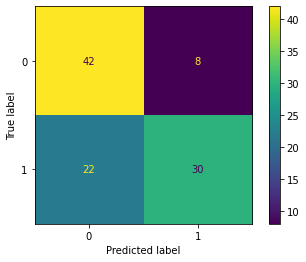

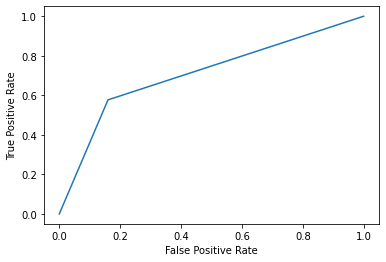

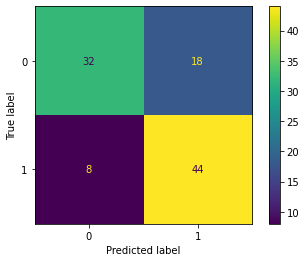

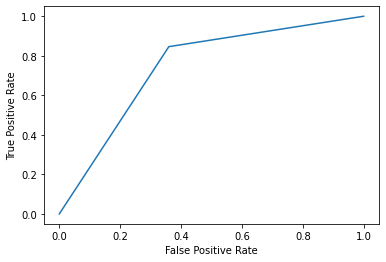

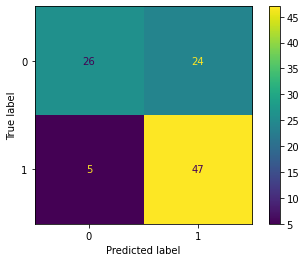

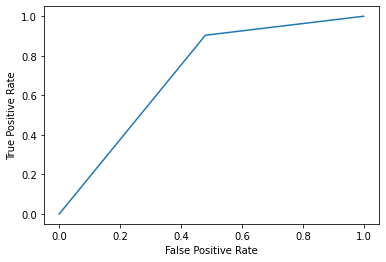

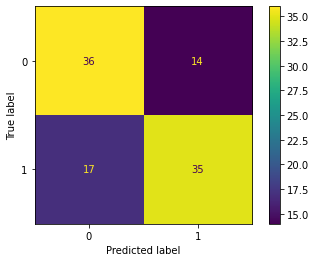

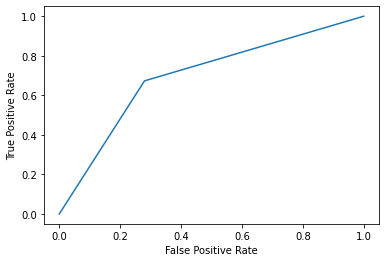

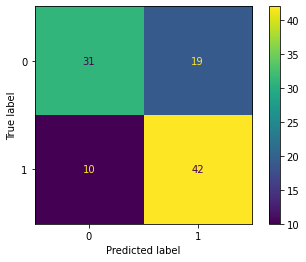

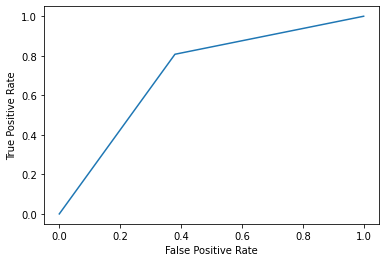

In [37]:
wandb.init(project='mdd-japanese-reho')  

#Sample elements randomly 

test_loader  = torch.utils.data.DataLoader(test_dataset_cv , batch_size=batch_size, shuffle=False)

bal_acc_fold=[]
F1_score_fold=[]

for k in np.arange(5): 

    print(f'Start TEST FOR FOLD {k}')

    path_fold = f'/data/zmohaghegh/TempStats_3D-CNN/best_model_reho_japanese/model-japanese_best-reho-fold-{k}.pth'

    network.load_state_dict(torch.load(path_fold))

    test_loss_cv=0
    total = 0
    correct=0

    F1_labels=[]
    F1_pred=[]

    network.eval() # preoare model for test and evaluation

    with torch.no_grad():
        #print('Start testing CV...')
        for i, data in enumerate(test_loader, 0):
            #print(f'test {i}')

            inputs, lables = data

            outputs = network(inputs)

            lables=lables.double()
            outputss=outputs.squeeze(1) #[10,1] ---> [10]

            #do the prediction 
            predicted = outputss.data > 0.0

            #calculate loss
            loss = loss_function(outputss, lables)

            test_loss_cv += loss.item()
            correct += (predicted == lables).sum().item()
            total += lables.size(0)

            if i==0:
                F1_labels=lables.int().numpy()
                F1_pred=predicted.int().numpy()
            else:
                F1_labels= np.concatenate((F1_labels, lables.int().numpy()))
                F1_pred = np.concatenate((F1_pred, predicted.int().numpy()))
            
        wandb.log({ "test_Acc_CV": 100 * correct /total  , "test_Loss_CV": test_loss_cv/total })
        
        acc = accuracy_score(F1_labels, F1_pred)
        bal_acc= balanced_accuracy_score(F1_labels, F1_pred)

        F1_Score = f1_score(F1_labels, F1_pred, average='weighted')
        tn, fp, fn, tp = confusion_matrix(F1_labels, F1_pred).ravel()
    
        F1_score_fold.append(F1_Score)
        bal_acc_fold.append(bal_acc)
        
        #PLotting Confusion matrix and ROC curve
        
        conf_matrix = confusion_matrix(F1_labels, F1_pred)
        conf_matrix_display = ConfusionMatrixDisplay(conf_matrix).plot()
        
        fp_rate, tp_rate, threshold = roc_curve(F1_labels, F1_pred)
        ROC_display = RocCurveDisplay(fpr=fp_rate, tpr=tp_rate).plot()
       

        wandb.log({ "test_balanced_Acc_CV": bal_acc , "test_Acc_CV": 100 * correct /total, "test_F1_score_CV": F1_Score , "test_Loss_CV": test_loss_cv/total })
        
        print(f'test_Acc_CV": {100 * correct /total}')
        print(f'F1_score CV ReHo :{F1_Score}')
        print(f'Balanced ACC CV ReHo :{bal_acc}')
        print(f'Loss CV ReHo : {test_loss_cv/total}')

In [38]:
import statistics

F1_score_avg= sum(F1_score_fold)/len(F1_score_fold)
F1_score_std= statistics.pstdev(F1_score_fold)
bal_acc_avg = 100 * (sum(bal_acc_fold)/len(bal_acc_fold))
bal_acc_std = 100* statistics.pstdev(bal_acc_fold)

print(f' Average Balance ACC japan ReHo = {bal_acc_avg}')
print(f'standard deviation :{bal_acc_std}')
print(f' Average F1_score japan ReHo = { F1_score_avg}')
print(f'standard deviation :{F1_score_std}')

 Average Balance ACC japan ReHo = 71.47692307692307
standard deviation :1.5378075533063027
 Average F1_score japan ReHo = 0.7112845936993976
standard deviation :0.016373682003243788
